In [26]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
from transformers import CLIPProcessor, CLIPModel, CLIPVisionModel
from torch.utils.data import DataLoader

In [4]:
pretrained_path = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(pretrained_path)
vision_model = CLIPVisionModel.from_pretrained(pretrained_path)
processor = CLIPProcessor.from_pretrained(pretrained_path)

### Display Output Representations from CLIPVision Model

In [5]:
path_train_dataset_10 = "data/food101_10percent/train/"
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor()
    ])
train_dataset_10 = datasets.ImageFolder(path_train_dataset_10, transform=transform)

# Look at N=10 random images in the dataset
N = 10
dataset_10_loader = DataLoader(train_dataset_10, batch_size=10, shuffle=True)

In [6]:
images, label = next(iter(dataset_10_loader))
inputs = processor(images=images, return_tensors="pt")
outputs = vision_model(**inputs)
last_hidden = outputs.last_hidden_state

In [23]:
input_values = inputs['pixel_values']

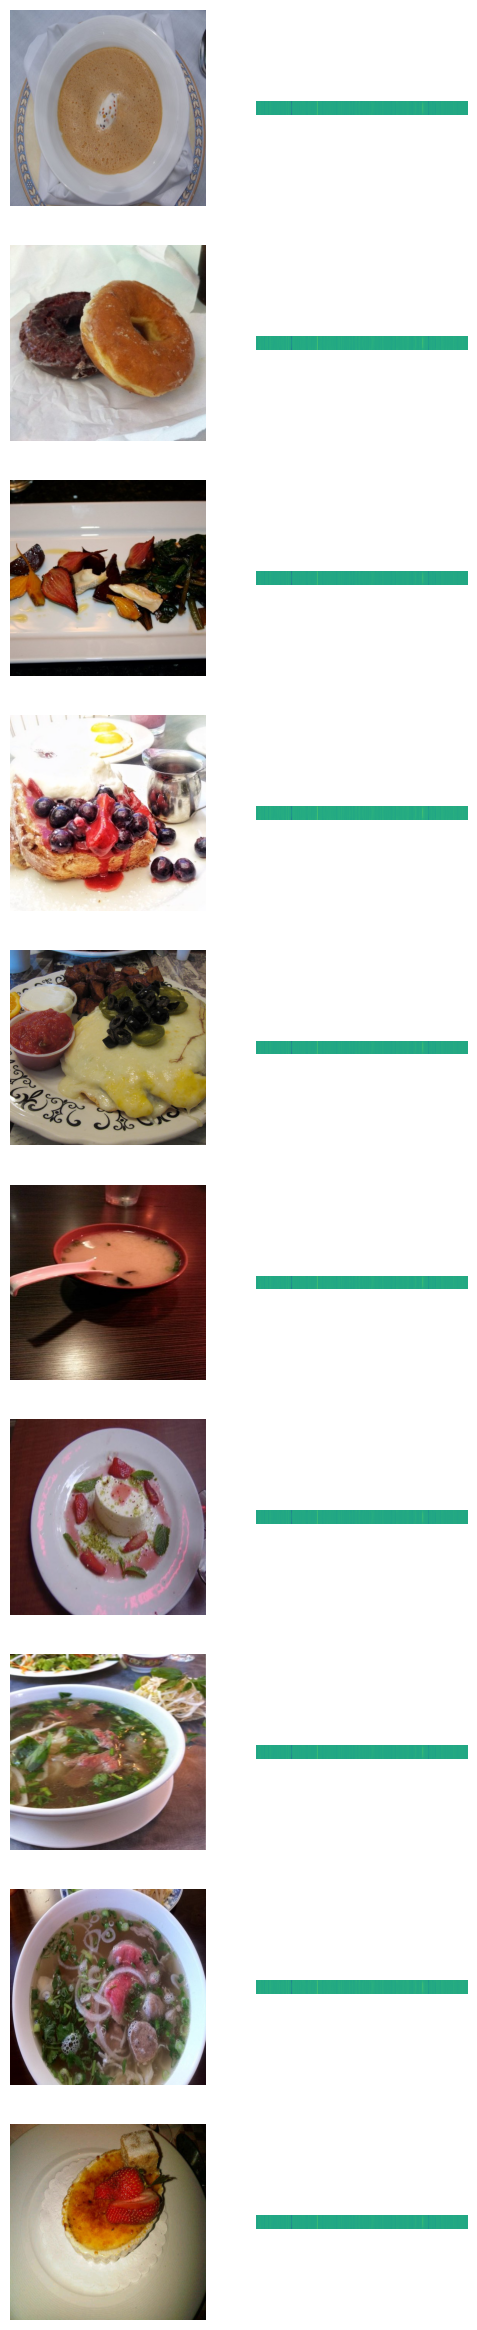

In [30]:
fig, ax = plt.subplots(N, 2, figsize=(6, 3*N))

for i in range(N):
    img = images[i]
    img = img.permute(1, 2, 0) # move the channel dimension from 0 to 2

    output = last_hidden[i]
    output = output.detach()

    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')

    ax[i, 1].imshow(output)
    ax[i, 1].axis('off')


### Calculate Similarity Scores of Images and Labels

(-0.5, 511.5, 511.5, -0.5)

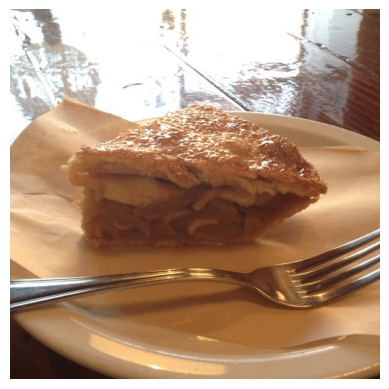

In [47]:
img_ind = 50
image, label = train_dataset_10[img_ind]

img = image
img = image.permute(1, 2, 0)
fig = plt.imshow(img)
plt.axis('off')

In [76]:
text = [
    "A photo of apple pie", 
    "A photo of a cat", 
    "A photo of a fork", 
    "A photo of a banana"]
inputs = processor(text=text, padding=True, truncation=True, images=image, return_tensors="pt")
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
probs = torch.squeeze(probs)

for i, text in enumerate(text):
    prob = probs[i]
    print(f"Text: {text:30} with probability: {prob}")

Text: A photo of apple pie           with probability: 0.204358771443367
Text: A photo of a cat               with probability: 0.2749412953853607
Text: A photo of a fork              with probability: 0.38906800746917725
Text: A photo of a banana            with probability: 0.131632000207901
